In [20]:
import cv2
import numpy as np
from numpy import asarray
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
img = Image.open('DLA_101_100_0.5.png').convert('L') #converts into a monochrome image
arr = asarray(img)
sobelxy = cv2.Sobel(src=arr, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
p = np.count_nonzero(sobelxy != 0)

#return p
print('count of non zero pixels:', p)


count of non zero pixels: 444


In [26]:
#img = Image.open('DLA_101_1000_0.115.png').convert('L')
img = Image.open('DLA_101_100_0.5.png').convert('L')
arr = asarray(img)

#img = cv2.imread('DLA_101_1000_0.1.png') 
#cv2.imshow('Original', img)
#cv2.waitKey(0)

shp = arr.shape
print("array is of shape", shp)

print(np.unique(arr))

N = np.count_nonzero(arr == 30)

print('count of 30 is :', N)

array is of shape (101, 101)
[ 30 215]
count of 30 is : 101


In [27]:
def neighbours(rows,columns,start_pt):

    x1y1 = np.array([(0,-1),(0,1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]) # possible steps in 8 directions
    x2y2 = list(map(tuple,x1y1 + start_pt))
    z = []
    for i in range(len(x2y2)):
        if( 0<= x2y2[i][0] <= columns-1 and 0<= x2y2[i][1] <= rows-1):
            z.append((x2y2[i]))  #getting just the possible coordinates around a pixel
        else:
            continue
    z = list(map(tuple,z))
    
    return z


In [28]:
# To find the number of zeros around a pixel
zeros_around = 0

for i in range(shp[0]-1):
    for j in range(shp[0]-1):
        if arr[i,j] == 30:
            points_around =  neighbours(shp[0], shp[1], (i,j))
            zeros = list(filter(lambda x : arr[x] == 215, points_around))
            zeros_around+= len(zeros)
    


print("Total number of zeros around each pixel of value 1 is:  ", zeros_around)

Total number of zeros around each pixel of value 1 is:   554


In [6]:
sobelxy = cv2.Sobel(src=arr, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
#cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
np.unique(sobelxy)
print(sobelxy.shape)

(101, 101)


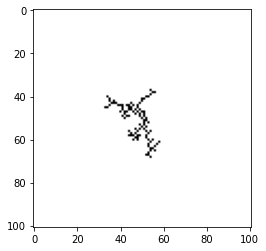

In [7]:
plt.imshow(img,cmap='gray')


count of non zero pixels: 485


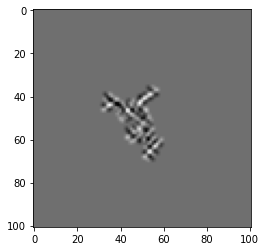

In [8]:
plt.imshow(sobelxy,cmap='gray')


p = np.count_nonzero(sobelxy != 0)

print('count of non zero pixels:', p)


In [44]:
points_around =  neighbours(shp[0], shp[1], (1,1))
zeros = list(filter(lambda x : arr[x] == 215, points_around))
print(len(zeros))
print('points_around', points_around )
print(zeros,'zeroes')


8
points_around [(1, 0), (1, 2), (2, 1), (0, 1), (2, 2), (2, 0), (0, 2), (0, 0)]
[(1, 0), (1, 2), (2, 1), (0, 1), (2, 2), (2, 0), (0, 2), (0, 0)] zeroes
